In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis import *
import simulation

In [2]:
testFile = "figure5__100000_1_2_100_EveryRound_0.90_0.90_1000_2_2_Linear_0_0.01.dat"
header = readHeader(filename = testFile)
summary = readSummary(filename=testFile,heterogeneous=header["heterogenous"])
summary

{'AverageContribution': 0.121264,
 'AverageContributionPerRoundRich': array([0.121266])}

In [3]:
def readFigure5Data():
    # Predefine some of the data:

    generations = 100000
    groupSize = 2
    popSize = 100
    numberOfGames = 1000
    wealthPoor = 2
    wealthRich = 2
    #typeOfRiskCurve = simulation.RiskCurve(3)
    heterogeneous = 0
    
    filename = "figure5_"

    #riskInRound = 1 # [1,2,3,4]
    riskInRound = simulation.RiskInRound(1)
    arrayAlphaPoor = np.array([0.1,0.5,0.9])
    arrayAlphaRich = np.array([0.1,0.5,0.9])
    arrayLambdaValue = np.array([0.01, 0.10, 1.00, 10.00, 100.00])
    arrayRiskCurve = np.array([1, 2, 3])
    arrayRounds = np.array([1, 4])
    
    ContributionFig5 = np.empty(shape=(3, 5, 3, 2))# [alphaConfiguration,globalLambda, riskcurves, rounds ]
    startIndex, endIndex = (70000,generations)
    
    for round_index in range(2):
        for riskCurve_index in range(3):
            for alpha_index in range(3):
                for lambda_index in range(5):
                    #### Load the file and the header #####
                    numberOfRounds = arrayRounds[round_index]
                    typeOfRiskCurve = simulation.RiskCurve(arrayRiskCurve[riskCurve_index])
                    StringName = "%s_%d_%d_%d_%d_%s_%0.2f_%0.2f_%d_%d_%d_%s_%d_%0.2f.dat" % (filename, generations, numberOfRounds,
                                                                                             groupSize, popSize, riskInRound.name, arrayAlphaPoor[alpha_index],
                                                                                             arrayAlphaRich[alpha_index], numberOfGames, wealthPoor, wealthRich,
                                                                                             typeOfRiskCurve.name, heterogeneous, arrayLambdaValue[lambda_index])
                    HeaderFile = readHeader(filename=StringName)

                    #### Compute the averaging over the relevant itterations #####
                    # Read out just the generations from start to end index
                    ContributionArray = readContributionFileToData(fileName = StringName, heterogeneous = HeaderFile["heterogenous"], rounds = int(HeaderFile["number_of_rounds"]))
                    #print(ContributionArray.shape)
                    Average = np.mean(ContributionArray[startIndex:endIndex,:],axis=0)
                    
                    #print(np.sum(Average)/2)
                    #thePoor = Average[1,:]
                    #theRich = Average[0,:]
                    
                    #### Save the contribution levels in the tensor #####
                    ContributionFig5[alpha_index, lambda_index, riskCurve_index, round_index] = np.sum(Average)/2 
    print(ContributionFig5)
    return ContributionFig5


[[[[0.01057937 0.03202219]
   [0.00845758 0.03617198]
   [0.00896848 0.03619669]]

  [[0.01030369 0.04643502]
   [0.01273752 0.04734577]
   [0.01055986 0.02794667]]

  [[0.0099234  0.04117453]
   [0.00937155 0.03420343]
   [0.0095947  0.06557557]]

  [[0.01839378 0.11408268]
   [0.0102163  0.02373011]
   [0.00890575 0.03810448]]

  [[0.01664284 0.05089846]
   [0.0093838  0.05491216]
   [0.00865959 0.04206448]]]


 [[[0.0189606  0.68149269]
   [0.01221713 0.02641485]
   [0.0112658  0.05896164]]

  [[0.01791192 0.18064573]
   [0.02961691 0.11298308]
   [0.01064263 0.06202395]]

  [[0.02859286 0.39872966]
   [0.02640586 0.26690076]
   [0.01403389 0.09408058]]

  [[0.10179643 0.1391043 ]
   [0.01614051 0.84711217]
   [0.01693496 0.58626904]]

  [[0.01773321 0.07662046]
   [0.01864557 0.68987077]
   [0.01541702 0.55129238]]]


 [[[0.05884767 0.5776366 ]
   [0.01367953 0.07250584]
   [0.01353583 0.09541883]]

  [[0.07583799 0.48805032]
   [0.05061852 0.16040552]
   [0.01553499 0.16142145]]



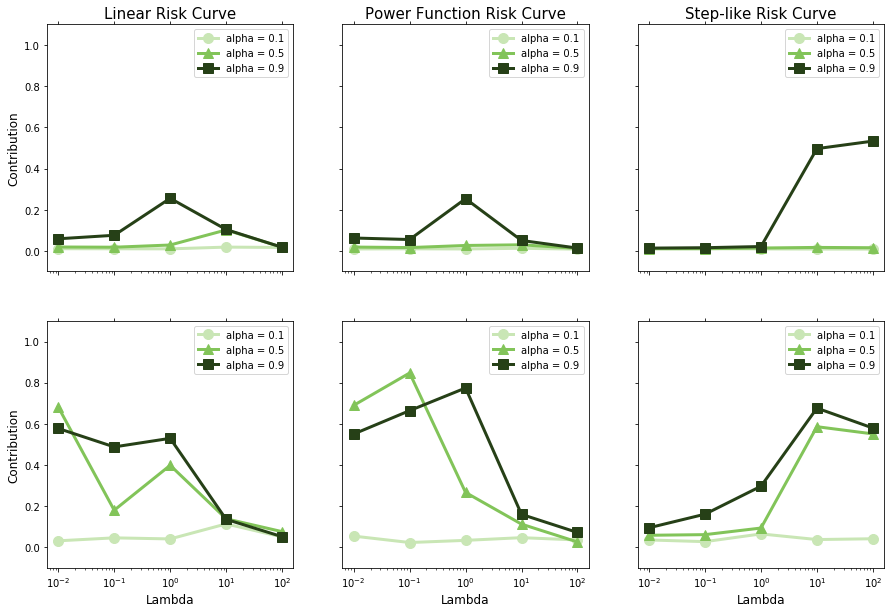

In [4]:
from pylab import *

def plotFigure5(ContributionTensor):
    """ Plots Figure 5 of the paper
    Attribute:
        -ContributionTensor: a 4 dimensional numpy tensor where the indexes correspond to:
            ContributionTensor[alphaConfiguration,lambda_config, riskCurve, rounds]
    """
    fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(15,10))
    
    # labels and titles
    Column_title = ["Linear Risk Curve", "Power Function Risk Curve", "Step-like Risk Curve"]
    y_axis_label = "Contribution"
    x_axis_label = "Lambda"
   
    
    arrayAlpha = np.array([0.1, 0.5, 0.9])
    arrayLambdaValue = np.array([0.01, 0.10, 1.00, 10.00, 100.00])
    
    #for row, (axs_row,(alphaPoor,alphaRich)) in enumerate(zip(axs,zip(arrayAlphaPoor,arrayAlphaRich))):
    for row, axs_row in enumerate((axs)):
        for column, ax  in enumerate(axs_row):
            ### Set labels and title
            if row == 0:
                ax.set_title(Column_title[column], fontsize=15)
            if column == 0:
                ax.set_ylabel(y_axis_label, fontsize=12)
            if row == 1:# aka the last row
                ax.set_xlabel(x_axis_label, fontsize=12)
               
            #arrayLambdaValue = np.array([0.01, 0.10, 1.00, 10.00, 100.00])
            #ax.plot(arrayLambdaValue, ContributionFig5[0,:, column, row], color = [0.79, 0.90, 0.71, 1], label = 'alpha = 0.1', marker = "o")
            #ax.plot(arrayLambdaValue, ContributionFig5[1,:, column, row], color = [0.51, 0.77, 0.35, 1], label = 'alpha = 0.5', marker = "^")
            #ax.plot(arrayLambdaValue, ContributionFig5[2,:, column, row], color = [0.15, 0.25, 0.09, 1], label = 'alpha = 0.9', marker = "s")
            #ax.legend()
            
            arrayLambdaValue = np.array([0.01, 0.10, 1.00, 10.00, 100.00])
            if column == 1:  
                ax.plot(1/arrayLambdaValue, ContributionFig5[0,:, column, row], color = [0.79, 0.90, 0.71, 1], label = 'alpha = 0.1', marker = "o", linewidth=3, markersize=10)
                ax.plot(1/arrayLambdaValue, ContributionFig5[1,:, column, row], color = [0.51, 0.77, 0.35, 1], label = 'alpha = 0.5', marker = "^", linewidth=3, markersize=10)
                ax.plot(1/arrayLambdaValue, ContributionFig5[2,:, column, row], color = [0.15, 0.25, 0.09, 1], label = 'alpha = 0.9', marker = "s", linewidth=3, markersize=10)
                ax.legend()
                ax.tick_params(top=True)
            else:
                ax.plot(arrayLambdaValue, ContributionFig5[0,:, column, row], color = [0.79, 0.90, 0.71, 1], label = 'alpha = 0.1', marker = "o", linewidth=3, markersize=10)
                ax.plot(arrayLambdaValue, ContributionFig5[1,:, column, row], color = [0.51, 0.77, 0.35, 1], label = 'alpha = 0.5', marker = "^", linewidth=3, markersize=10)
                ax.plot(arrayLambdaValue, ContributionFig5[2,:, column, row], color = [0.15, 0.25, 0.09, 1], label = 'alpha = 0.9', marker = "s", linewidth=3, markersize=10)
                ax.legend()
                ax.tick_params(top=True)

            
                
ContributionFig5 = readFigure5Data()
plotFigure5(ContributionFig5)
plt.xscale('log')
plt.ylim(-0.1,1.1)
rc('axes', linewidth=1)
plt.savefig('Fig5.jpg', format='jpg', dpi=1200)

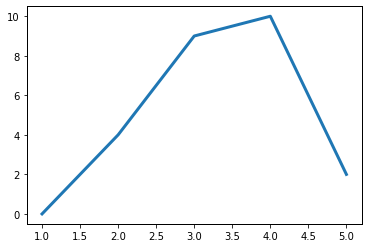

In [70]:
from pylab import *
x = np.array([1, 1.5,  2 ,3 ,4 ,5])
y = np.array([0, 2, 4 ,9 ,10 ,2])

plt.plot(x, y, linewidth=3)
rc('axes', linewidth=0.1)

